In [60]:
import pandas as pd
import numpy as np
from typing import Dict, Tuple
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

### Рассмотрим задачу классификации на примере breast cancer wisconsin dataset.

### 1. Загрузим данные.

In [15]:
def make_dataframe(ds_function):
    ds = ds_function()
    df = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                     columns= list(ds['feature_names']) + ['target'])
    return df

In [16]:
df = make_dataframe(load_breast_cancer)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 2. Разделим выборку на обучающую и тестовую.

In [34]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)


In [35]:
X_train.shape, y_train.shape

((398, 30), (398,))

#### Посмотрим на баланс классов в выборке.

In [41]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts_perc)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [42]:
print_class_proportions(df.target)

Метка 	 Количество 	 Процент встречаемости
0.0 	 212 	 	 37.26%
1.0 	 357 	 	 62.74%


### 3. Обучим модель ближайших соседей для произвольно заданного гиперпараметра K. Оценим качество модели с помощью метрики accuracy_score - доли правильных ответов.

In [36]:
k = 5
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)
print('Качество модели на обучающей выборке: ', accuracy_score(y_train, train_pred))
print('Качество модели на тестовой выборке: ', accuracy_score(y_test, test_pred))

Качество модели на обучающей выборке:  0.9547738693467337
Качество модели на тестовой выборке:  0.935672514619883


#### Доля правильных ответов для разных меток.

In [44]:
def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [46]:
print_accuracy_score_for_classes(y_train, train_pred)

Метка 	 Accuracy
0.0 	 0.9084967320261438
1.0 	 0.9836734693877551


In [47]:
print_accuracy_score_for_classes(y_test, test_pred)

Метка 	 Accuracy
0.0 	 0.8983050847457628
1.0 	 0.9553571428571429


#### Матрицы ошибок для обучающей и тестовой выборок.

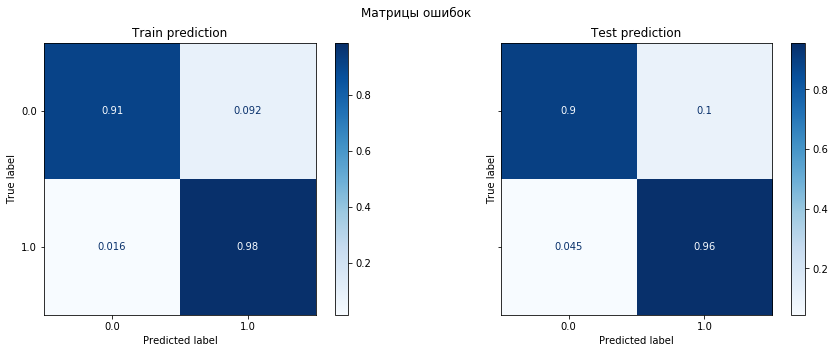

In [53]:
fig, ax = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(15,5))

plot_confusion_matrix(clf, X_train, y_train,  
                      cmap=plt.cm.Blues, normalize='true', ax=ax[0])

plot_confusion_matrix(clf, X_test, y_test,
                      cmap=plt.cm.Blues, normalize='true', ax=ax[1])

fig.suptitle('Матрицы ошибок')
ax[0].title.set_text('Train prediction')
ax[1].title.set_text('Test prediction')

### 4. Построим модель и оценим качество модели с использованием кросс-валидации.

In [61]:
skf = StratifiedKFold(n_splits=5)

In [77]:
# метрики
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted', 
           'acc': 'accuracy'
          }
# модель
scores = cross_validate(KNeighborsClassifier(n_neighbors=3), 
                        X, y, scoring=scoring, 
                        cv=skf, return_train_score=True)
scores

{'fit_time': array([0.0089941 , 0.00399685, 0.0039978 , 0.0039978 , 0.0039978 ]),
 'score_time': array([0.01099443, 0.00899506, 0.00799513, 0.00799537, 0.00799537]),
 'test_precision': array([0.88487211, 0.92082637, 0.94743954, 0.9384353 , 0.9128919 ]),
 'train_precision': array([0.95517539, 0.94991628, 0.95836038, 0.95439271, 0.9542154 ]),
 'test_recall': array([0.87719298, 0.92105263, 0.94736842, 0.93859649, 0.91150442]),
 'train_recall': array([0.95384615, 0.94945055, 0.95824176, 0.95384615, 0.95394737]),
 'test_f1': array([0.87315328, 0.92086428, 0.94708706, 0.93843833, 0.91190133]),
 'train_f1': array([0.95336417, 0.94907721, 0.95805616, 0.9535115 , 0.95367797]),
 'test_acc': array([0.87719298, 0.92105263, 0.94736842, 0.93859649, 0.91150442]),
 'train_acc': array([0.95384615, 0.94945055, 0.95824176, 0.95384615, 0.95394737])}

In [76]:
print('{:<10} {:<10} {:<10}'.format('metric', 'Train', 'Test'))
for scor in scoring:
    for k in scores:
        if scor in k and 'test' in k:#k.startswith('test') or k.startswith('train'):
            tst = np.mean(scores[k])
        elif scor in k and 'train' in k:
            trn = np.mean(scores[k])

    print('{:<10} {:<10} {:<10}'.format(scor, trn, tst))

metric     Train      Test      
precision  0.9544120334258646 0.9208930460879466
recall     0.9538663967611336 0.9191429902189101
f1         0.9535374001921969 0.9182888548849656
acc        0.9538663967611336 0.9191429902189101


### 5. Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.

In [99]:
parameters = [{'n_neighbors': np.arange(1, 30)}]

In [100]:
clf_gs = GridSearchCV(KNeighborsClassifier(), parameters, cv = skf, scoring='accuracy')

In [101]:
clf_gs.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy')

In [102]:
print('Best K: ', clf_gs.best_params_)

Best K:  {'n_neighbors': 13}


In [103]:
print('Best score: ', clf_gs.best_score_)

Best score:  0.9332401800962584


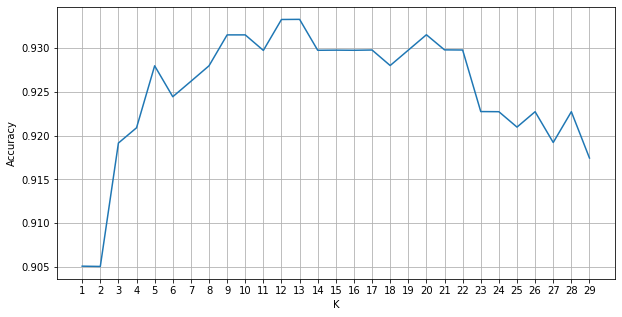

In [104]:
plt.figure(figsize=(10,5))
plt.plot(parameters[0]['n_neighbors'], clf_gs.cv_results_['mean_test_score'])
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(parameters[0]['n_neighbors'])
plt.grid();